In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3 MB 16 kB/s 


In [5]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170500096/170498071 [==============================] - 4s 0us/step


## Data Visualization

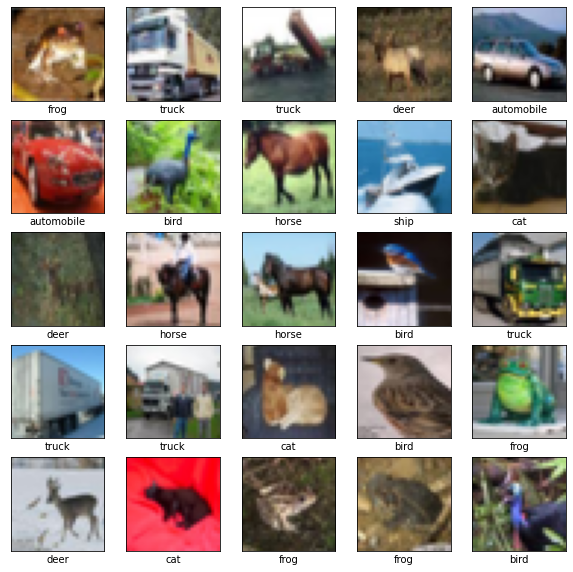

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
import tf.keras.preprocessing.image.ImageDataGenerator
train_datagen = ImageDataGenerator()

## Net A

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=50, 
                    validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 83.0855 - accuracy: 0.2788 - val_loss: 110.5722 - val_accuracy: 0.2044
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 83.3561 - accuracy: 0.2759 - val_loss: 60.8849 - val_accuracy: 0.2885
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 79.1143 - accuracy: 0.2814 - val_loss: 90.5394 - val_accuracy: 0.2614
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 82.8801 - accuracy: 0.2788 - val_loss: 97.6389 - val_accuracy: 0.2428
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 82.8974 - accuracy: 0.2830 - val_loss: 103.4727 - val_accuracy: 0.2405
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 85.2221 - accuracy: 0.2788 - val_loss: 99.4589 - val_accuracy: 0.2669
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 80.8218 - accuracy: 0.2890 - val_loss: 103.078

### Data Visualization for Net A

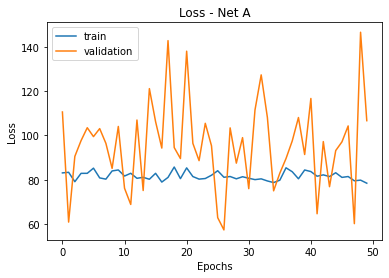

In [33]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss - Net A')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

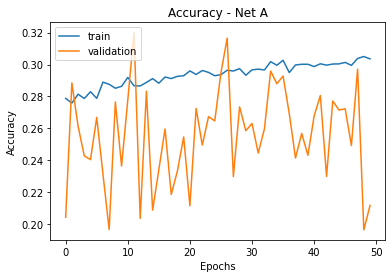

In [34]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy - Net A')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Net B

In [21]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(300, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [22]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [23]:
history2 = model2.fit(x_train, y_train, epochs=50, 
                    validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 22.2665 - accuracy: 0.1191 - val_loss: 2.3073 - val_accuracy: 0.1004
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3036 - accuracy: 0.0974 - val_loss: 2.3063 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3050 - accuracy: 0.1007 - val_loss: 2.3039 - val_accuracy: 0.0998
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3041 - val_accuracy: 0.0998
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3034 - val_accu

### Data Visualization for Net B

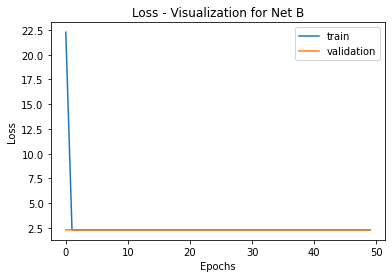

In [35]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validation')
plt.title('Loss - Visualization for Net B')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

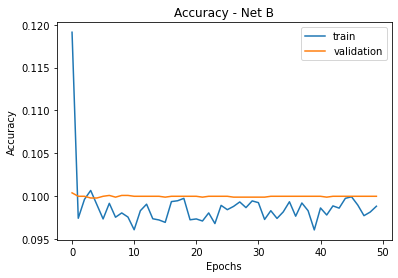

In [32]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='validation')
plt.title('Accuracy - Net B')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Net C

In [27]:
def my_model():
    input_ = tf.keras.layers.Input((32, 32, 3))
    
    net = tf.keras.layers.Conv2D(25, (5, 5), strides=(1, 1), padding='valid', activation='relu')(input_)
    net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(net)
    
    net = tf.keras.layers.Flatten()(net)
    out = tf.keras.layers.Dense(10, activation='softmax')(net)
    
    model = tf.keras.Model(inputs=[input_], outputs=[out])

    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
                  optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                  metrics=['accuracy'])
    model.summary()
    return model

In [28]:
model3 = my_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 25)        1900      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 25)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4900)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                49010     
Total params: 50,910
Trainable params: 50,910
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [29]:
history3 = model3.fit(x_train, y_train, epochs=50, 
                    validation_data=(x_test, y_test)
)

Epoch 1/50
1563/1563 [==============================] - 33s 21ms/step - loss: 3.0718 - accuracy: 0.1688 - val_loss: 2.2418 - val_accuracy: 0.1557
Epoch 2/50
1563/1563 [==============================] - 34s 22ms/step - loss: 2.1447 - accuracy: 0.2135 - val_loss: 2.1367 - val_accuracy: 0.2279
Epoch 3/50
1563/1563 [==============================] - 33s 21ms/step - loss: 2.0720 - accuracy: 0.2405 - val_loss: 2.0567 - val_accuracy: 0.2811
Epoch 4/50
1563/1563 [==============================] - 34s 22ms/step - loss: 2.0212 - accuracy: 0.2609 - val_loss: 1.9922 - val_accuracy: 0.2968
Epoch 5/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9713 - accuracy: 0.2833 - val_loss: 2.0008 - val_accuracy: 0.2783
Epoch 6/50
1563/1563 [==============================] - 34s 22ms/step - loss: 1.9532 - accuracy: 0.2882 - val_loss: 2.1137 - val_accuracy: 0.2612
Epoch 7/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9155 - accuracy: 0.3037 - val_loss: 2.0845 -

### Data Visualization of Net C

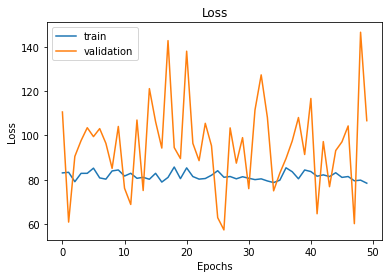

In [30]:
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='validation')
plt.title('Loss - Net C')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

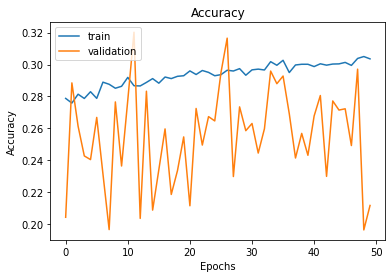

In [31]:
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='validation')
plt.title('Accuracy - Net C')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()